# Exploratory Data Analysis: OpenPowerlifting

OpenPowerlifting collects data on powerlifting competitions including information on age, sex, equipment, placing, and of course the actual weights lifted. In this notebook, I explore several of the variables and use visualizations to better understand the contents of the data and to answer questions about the data.

Special thanks goes to the volunteers who maintain OpenPowerlifting.

Data source: [OpenPowerlifting](https://openpowerlifting.gitlab.io/opl-csv/bulk-csv.html)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('openpowerlifting-2023-08-05.csv')

/tmp/ipykernel_10489/432748572.py:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('openpowerlifting-2023-08-05.csv')


List the variables and their types

In [86]:
df.dtypes

Name                        object
Sex                         object
Event                       object
Equipment                   object
Age                        float64
AgeClass                    object
BirthYearClass              object
Division                    object
BodyweightKg               float64
WeightClassKg               object
Squat1Kg                   float64
Squat2Kg                   float64
Squat3Kg                   float64
Squat4Kg                   float64
Best3SquatKg               float64
Bench1Kg                   float64
Bench2Kg                   float64
Bench3Kg                   float64
Bench4Kg                   float64
Best3BenchKg               float64
Deadlift1Kg                float64
Deadlift2Kg                float64
Deadlift3Kg                float64
Deadlift4Kg                float64
Best3DeadliftKg            float64
TotalKg                    float64
Place                       object
Dots                       float64
Wilks               

Here I update the data variable to use the proper type and generate new month and year variables for grouping.

In [85]:
# replace date column with version converted to appropriate type
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

## Exploring a Variable: Competitor Sex

First, I use a simple bar chart to understand the gender composition of all the competitors in the dataset.

<Axes: >

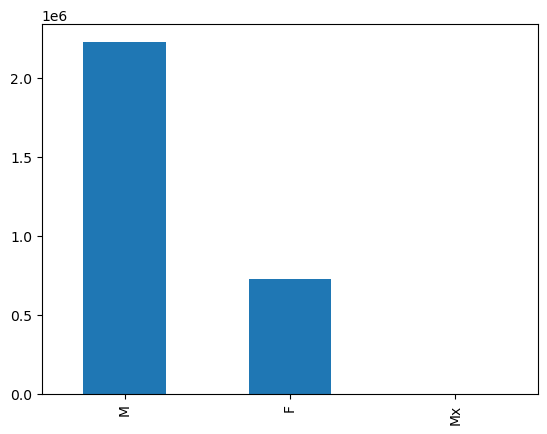

In [6]:
df['Sex'].value_counts().plot(kind='bar')

Clearly, most existing records are for male competitors. However, I expect that the gender composition of powerlifting has changed over time. Espeically because of traditionalist ideas of what women should/can do, which are not nearly as prevalent in many of the countries where powerlifting is most popular.

In [87]:
df['Year'].value_counts()

2019    262865
2018    250339
2017    234668
2016    216978
2022    201704
2015    191879
2021    177971
2014    157105
2020    139694
2013    116278
2012    100318
2023     96658
2011     88155
2010     77389
2009     43978
2008     41198
2007     38345
2006     32260
2004     31651
2003     31011
2005     30921
1984     29954
2002     29127
1983     28063
1982     24671
2001     22805
1985     22014
1981     21655
2000     20407
1980     20007
1998     18646
1999     18083
1995     16081
1997     15277
1996     13321
1993     11368
1992     11178
1991     10988
1994     10753
1990     10488
1989      9617
1988      8023
1987      6963
1986      5936
1979      3149
1977      1080
1978       698
1976       552
1975       504
1974       491
1972       257
1973       167
1971       151
1968       108
1970        94
1967        72
1966        71
1969        57
1965        45
1964        39
Name: Year, dtype: int64

This leads me to consider the raw numbers of male, female, or non-binary competitors over time, plotted below.

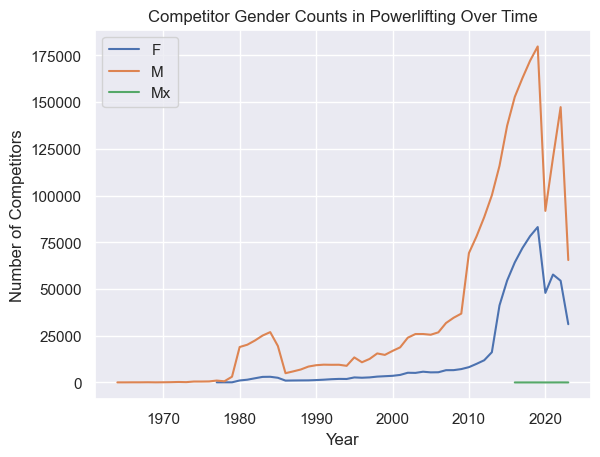

In [88]:
fig, ax = plt.subplots()

ax.plot(df[['Sex','Year']].groupby('Year').value_counts().unstack())

ax.set_title('Competitor Gender Counts in Powerlifting Over Time')
ax.set_ylabel('Number of Competitors')
ax.set_xlabel('Year')
ax.legend(['F', 'M', 'Mx'])

While men still make up the majority of powerlifting competitors, the share of women competing in powerlifting has steadily risen. Also, notice that the rapid growth in female competitors (likely related to the increasing popularity of raw powerlifting) lags sligthly behind the rapid growth in male competitors. Also, this graph shows the impact of the COVID-19 pandemic on powerlifting. However, note that the dramatic fall in the number of both male and female competitors represents the fact there is still more data to collect in 2023. In the end, the trend may continue upward following the dip caused by COVID-19.

TODO: Competitors over time regardless of gender

## Exploring a Variable: Equipment

Next, I explore the "equipment" variable. Powerlifting competitions use equipment classes to designate different levels of supportive equipment allowed. "Raw" powerlifting dominates the sport right now, likely in part due to the lower barriers to entry. But historically, many competitors favored equipped lifting, especially single-ply, which allows more support than raw, but less than multi-ply or unlimited.

<Axes: >

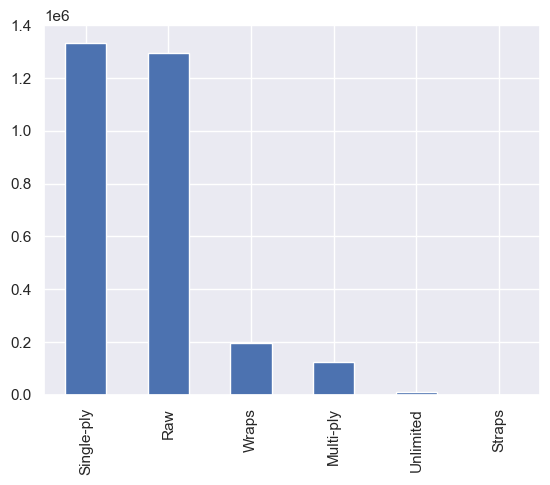

In [89]:
df['Equipment'].value_counts().plot(kind='bar')

Single-ply still makes up the majority of observations in the dataset, but raw will likely soon surpass this.

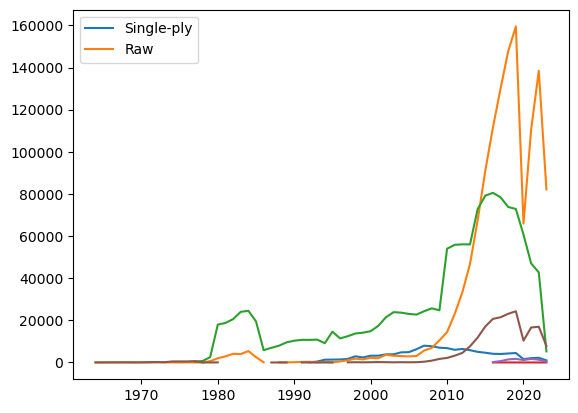

In [9]:
fig, ax = plt.subplots()

ax.plot(df[['Equipment', 'Year']].groupby('Year').value_counts().unstack())
ax.legend(['Single-ply', 'Raw'])

plt.show()

<Axes: xlabel='Year'>

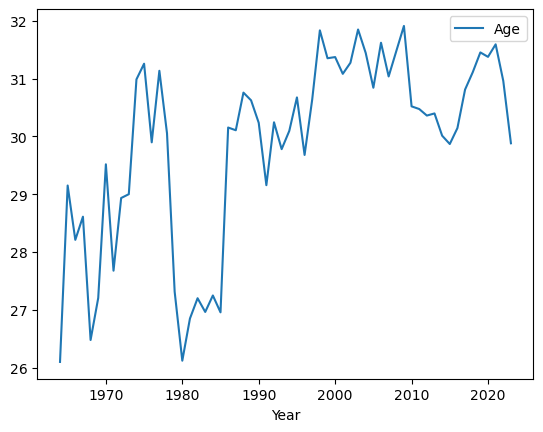

In [10]:
df[['Age', 'Year']].groupby('Year').mean().plot()

I did not expect to find that the average age of competitors fluctuates around 30 years old. I expected to find a clear negative trend in recent years with the rise of fitness influencers, since many of those influencers are either young or target a younger audience. I speculate that the increase in younger competitors has been balanced out by a growth in powerlifting among older populations as well.

<Axes: ylabel='Frequency'>

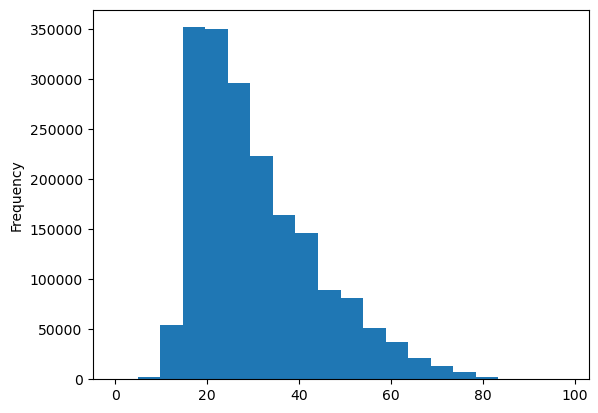

In [11]:
ages = df[['Age', 'Year']]

df['Age'].plot(kind='hist', bins=20)

In [12]:
ages = ages[ages['Age'].notna()]

def bin_age():
	col_name = f'AgeRange'

	def apply_age_range(age):
		start = age // 10 * 10
		return f'{start}-{start+9}'
		

	ages[col_name] = df['Age'].apply(apply_age_range)
        
bin_age()

ages_cat = ages.groupby(['Year', 'AgeRange'])['AgeRange'].count().unstack()

In [13]:
ages_cat['Total'] = ages_cat.sum(axis=1)

In [14]:
ages_prop = ages_cat.iloc[:, :-1].div(ages_cat['Total'], axis=0)
ages_prop.fillna(0, inplace=True)

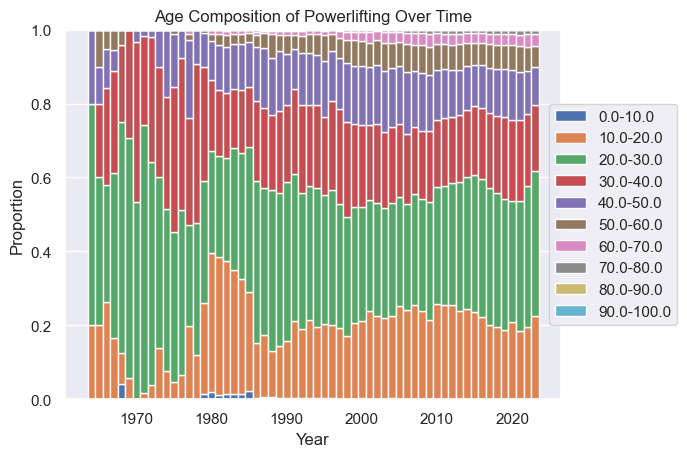

In [19]:
fig, ax = plt.subplots()

sns.set_theme()

for year, row in ages_prop.iterrows():
    bottom = 0
    for age_range in row:
        ax.bar(year, age_range, width=1, bottom=bottom)
        bottom += age_range
ax.legend(ages_prop.columns, loc='right', bbox_to_anchor=(1.25,0.5))

ax.set_title("Age Composition of Powerlifting Over Time")
ax.set_xlabel('Year')
ax.set_ylabel('Proportion')

plt.show()


First, note that the smaller totals in early years cause large changes in proportions. Larger totals in more recent years smooth the year-to-year changes in proportions. Unsurprisingly, individuals younger than 40 comprise the vast majority of powerlifing competitors. This holds true over the entire time interval. However, notice that 40+ competitors fairly consistently have increased their total share, but may have plateaued more recently. This may reflect an influx of younger competitors while the share of 40+ competitors holds steady.

In [71]:
equip = df[['Year', 'Equipment']].groupby('Year')['Equipment'].value_counts().unstack().fillna(0)

In [83]:
equip['Total'] = equip.sum(axis=1)
colors = {"Multi-ply": "green", "Single-ply": "red", 'Raw': 'purple', 'Wraps': 'orange', 'Unlimited': 'black', 'Straps': 'brown'}


equip = equip.iloc[:, :-1].div(equip['Total'], axis=0)
equip

Equipment,Multi-ply,Raw,Single-ply,Straps,Unlimited,Wraps
Year,,,,,,
1964,0.000000,0.461538,0.000000,0.000000,0.000000,0.538462
1965,0.000000,0.066667,0.000000,0.000000,0.000000,0.933333
1966,0.000000,0.140845,0.000000,0.000000,0.000000,0.859155
1967,0.000000,0.027778,0.000000,0.000000,0.000000,0.972222
1968,0.000000,0.277778,0.000000,0.000000,0.000000,0.722222
1969,0.000000,0.035088,0.000000,0.000000,0.000000,0.964912
1970,0.000000,0.053191,0.000000,0.000000,0.000000,0.946809
1971,0.000000,0.026490,0.000000,0.000000,0.000000,0.973510
1972,0.000000,0.194553,0.000000,0.000000,0.000000,0.805447


Equipment
Multi-ply     0.000000
Raw           0.461538
Single-ply    0.000000
Straps        0.000000
Unlimited     0.000000
Wraps         0.538462
Name: 1964, dtype: float64
0.0
0.46153846153846156
0.0
0.0
0.0
0.5384615384615384
Equipment
Multi-ply     0.000000
Raw           0.066667
Single-ply    0.000000
Straps        0.000000
Unlimited     0.000000
Wraps         0.933333
Name: 1965, dtype: float64
0.0
0.06666666666666667
0.0
0.0
0.0
0.9333333333333333
Equipment
Multi-ply     0.000000
Raw           0.140845
Single-ply    0.000000
Straps        0.000000
Unlimited     0.000000
Wraps         0.859155
Name: 1966, dtype: float64
0.0
0.14084507042253522
0.0
0.0
0.0
0.8591549295774648
Equipment
Multi-ply     0.000000
Raw           0.027778
Single-ply    0.000000
Straps        0.000000
Unlimited     0.000000
Wraps         0.972222
Name: 1967, dtype: float64
0.0
0.027777777777777776
0.0
0.0
0.0
0.9722222222222222
Equipment
Multi-ply     0.000000
Raw           0.277778
Single-ply    0.000000


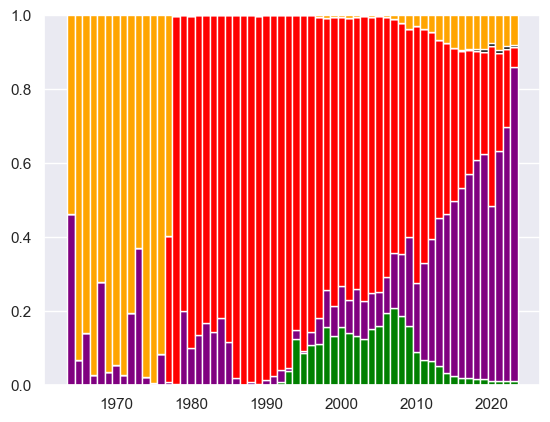

In [84]:
fig, ax = plt.subplots()

for year, row in equip.iterrows():
    bottom = 0
    print(row)
    for i, cat in enumerate(row):
        print(cat)
        ax.bar(year, cat, width=1, bottom=bottom, color=colors[row.index[i]])
        bottom += cat
        
# equip